In [3]:
import numpy as numpy
import matplotlib.pyplot as plt
import os

In [52]:
dir = os.getcwd()
keypoints_non_normalized = numpy.load(dir + '/mp_data_non_normalised/mp_data_ood_unprocessed/F/0/22.npy')
keypoints_non_normalized2 = numpy.load(dir + '/mp_data_non_normalised/mp_data_ood_unprocessed/F/2/43.npy')
keypoints_normalized = numpy.load(dir + '/mp_data_normalised/mp_data_newest/L/0/0.npy')
keypoints_normalized_left = numpy.load(dir + '/mp_data_normalised/mp_data_newest_left_4/L/0/0.npy')

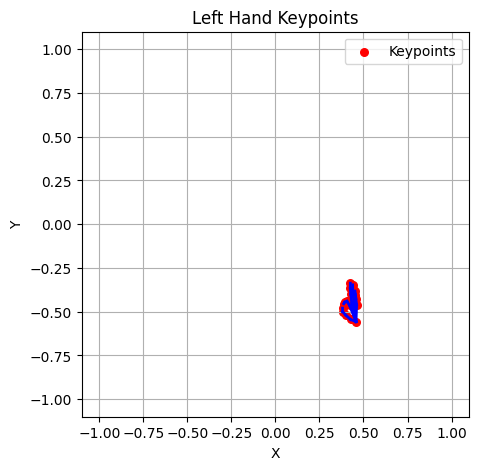

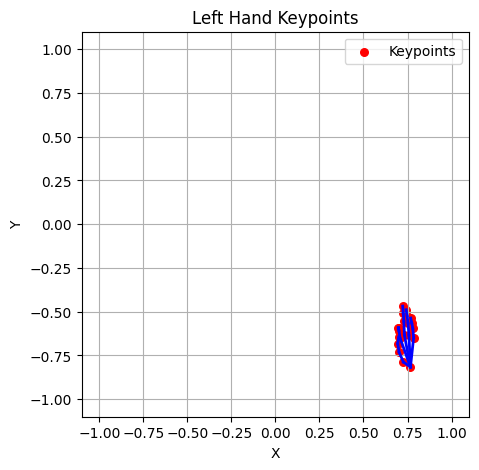

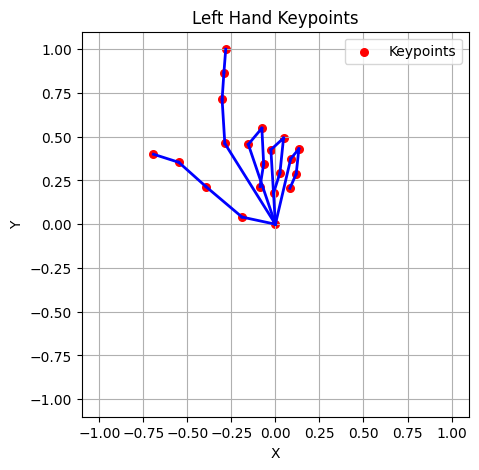

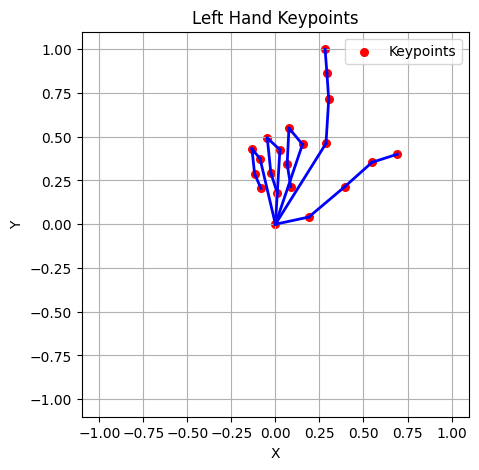

In [55]:
keypoints = keypoints_non_normalized.reshape(21,2)
keypoints2 = keypoints_non_normalized2.reshape(21,2)
keypoints_normalized = keypoints_normalized.reshape(21,2)
keypoints_normalized_left = keypoints_normalized_left.reshape(21,2)

def plot_hand(keypoints):

    HAND_CONNECTIONS = [
        (0, 1), (1, 2), (2, 3), (3, 4),
        (0, 5), (5, 6), (6, 7), (7, 8),
        (0, 9), (9, 10), (10, 11), (11, 12),
        (0, 13), (13, 14), (14, 15), (15, 16),
        (0, 17), (17, 18), (18, 19), (19, 20)
    ]

    x, y = keypoints[:, 0], -keypoints[:, 1]
    plt.figure(figsize=(5, 5))
    plt.scatter(x, y, s=30, color='red', label='Keypoints')

    for connection in HAND_CONNECTIONS:
        x_values = [keypoints[connection[0], 0], keypoints[connection[1], 0]]
        y_values = [-keypoints[connection[0], 1], -keypoints[connection[1], 1]]
        plt.plot(x_values, y_values, 'b-', linewidth=2)

    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Left Hand Keypoints')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_hand(keypoints)
plot_hand(keypoints2)
plot_hand(keypoints_normalized)
plot_hand(keypoints_normalized_left)

In [6]:
import numpy as np
import argparse
import os

LEFT_TO_RIGHT_LANDMARKS = [
    0,  # Wrist remains the same
    1, 2, 3, 4,  # Thumb (same order)
    8, 7, 6, 5,  # Index finger (reverse order)
    12, 11, 10, 9,  # Middle finger (reverse order)
    16, 15, 14, 13,  # Ring finger (reverse order)
    20, 19, 18, 17,  # Pinky (reverse order)
]

# Paths to original (right-hand) and mirrored (left-hand) dataset
def process_dataset(input):
   
    # Load right-hand keypoints
    right_hand_keypoints = input
    left_hand_keypoints = right_hand_keypoints.reshape(21,2)
    left_hand_keypoints[:,0] *= -1
    left_hand_keypoints = left_hand_keypoints.flatten()

    # Reshape to (21, 2) format
    right_hand_keypoints = input.reshape(21, 2)

    # Reflect the hand across the X-axis
    left_hand_keypoints = right_hand_keypoints.copy()
    left_hand_keypoints[:, 0] *= -1  # Flip X-coordinates

    # Flatten back to (42,)
    left_hand_keypoints = left_hand_keypoints.flatten()

    plot_hand(right_hand_keypoints.reshape(21,2))
    plot_hand(left_hand_keypoints.reshape(21,2))



[0.67009908 0.65654838 0.62039232 0.63953155 0.57541299 0.59936965
 0.54007179 0.56446296 0.51151228 0.55080086 0.59374297 0.51558143
 0.58417565 0.44678631 0.58119088 0.40980235 0.5784117  0.37448275
 0.62340099 0.51385903 0.62534028 0.47602463 0.63001901 0.5360058
 0.62997025 0.56741899 0.65223664 0.52062857 0.65300202 0.49125373
 0.65293372 0.54980725 0.65064013 0.57648599 0.67917901 0.53445983
 0.67886734 0.50846398 0.67507625 0.54974389 0.6718154  0.57058847]
[[0.67009908 0.65654838]
 [0.62039232 0.63953155]
 [0.57541299 0.59936965]
 [0.54007179 0.56446296]
 [0.51151228 0.55080086]
 [0.59374297 0.51558143]
 [0.58417565 0.44678631]
 [0.58119088 0.40980235]
 [0.5784117  0.37448275]
 [0.62340099 0.51385903]
 [0.62534028 0.47602463]
 [0.63001901 0.5360058 ]
 [0.62997025 0.56741899]
 [0.65223664 0.52062857]
 [0.65300202 0.49125373]
 [0.65293372 0.54980725]
 [0.65064013 0.57648599]
 [0.67917901 0.53445983]
 [0.67886734 0.50846398]
 [0.67507625 0.54974389]
 [0.6718154  0.57058847]]
[[-0.

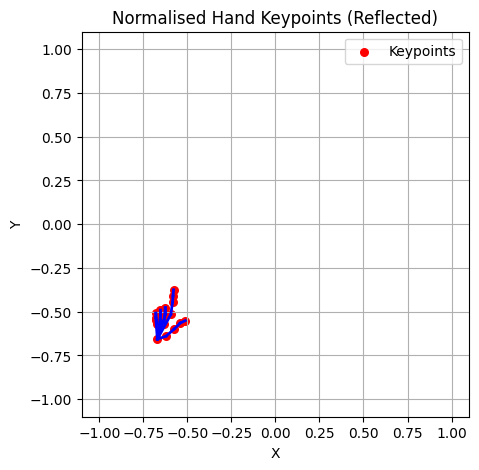

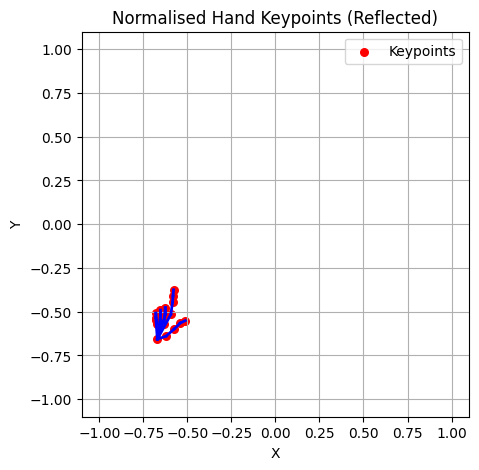

In [5]:
process_dataset(keypoints_non_normalized)